In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


random.seed(10)

In [2]:
path = os.path.dirname(os.path.abspath(__name__)) + "/../../data/x_train.txt"
x_train = pd.read_csv(path, sep=" ", header=None)
path = os.path.dirname(os.path.abspath(__name__)) + "/../../data/y_train.txt"
y_train = pd.read_csv(path, sep=" ", header=None)

In [161]:
y_train == 1

,0
0,False
1,False
2,True
3,True
4,True
...,...
4995,True
4996,False
4997,False
4998,False


In [164]:
y = y_train.copy()
y.columns = ["y"]
train = pd.concat([x_train, y], axis=1)
train_important = train.iloc[:, [100, 101, 102, 103, 104, 105]]

In [165]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
train_important_pca = pca.fit_transform(train_important)
train_important_pca

array([[-1.06948221, -0.10795446],
       [ 1.13828831,  1.25153323],
       [ 0.92357749,  0.35243788],
       ...,
       [ 0.07959376, -1.39593613],
       [-0.50071043,  1.35259638],
       [ 0.80383684,  0.05852891]])

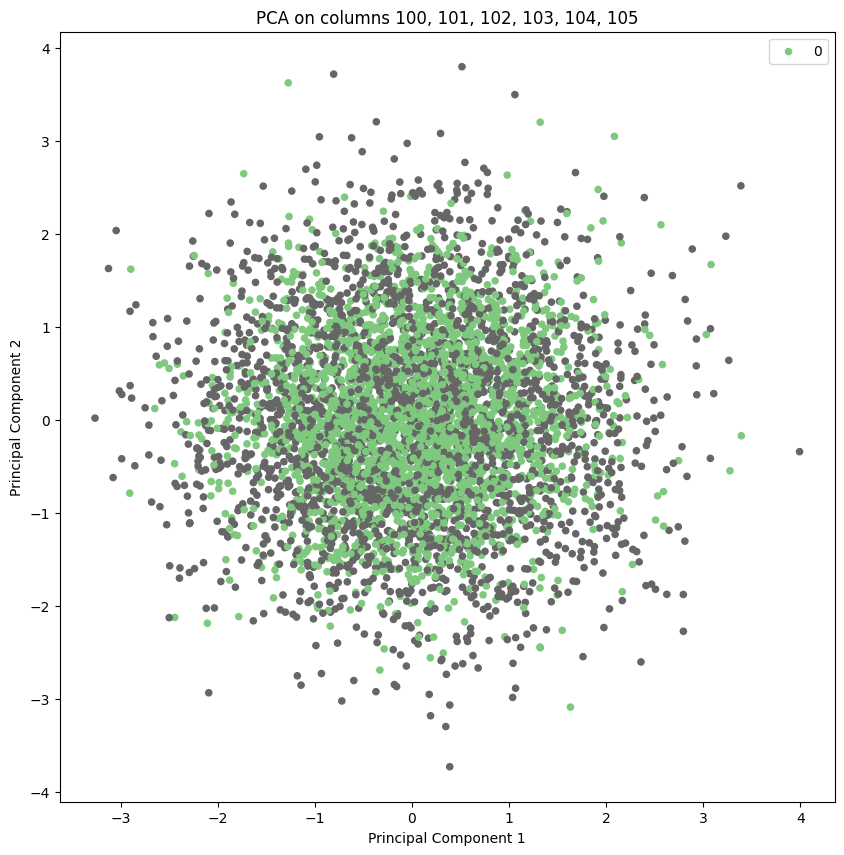

In [166]:
# Plot
plt.figure(figsize=(10, 10))
plt.scatter(
    train_important_pca[:, 0],
    train_important_pca[:, 1],
    c=y_train,
    s=20,
    cmap="Accent",
)
plt.title("PCA on columns 100, 101, 102, 103, 104, 105")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(["0", "1"])
plt.show()

[[-1.06948221]
 [ 1.13828831]
 [ 0.92357749]
 ...
 [ 0.07959376]
 [-0.50071043]
 [ 0.80383684]]


Text(0.5, 1.0, 'PCA on columns 100, 101, 102, 103, 104, 105')

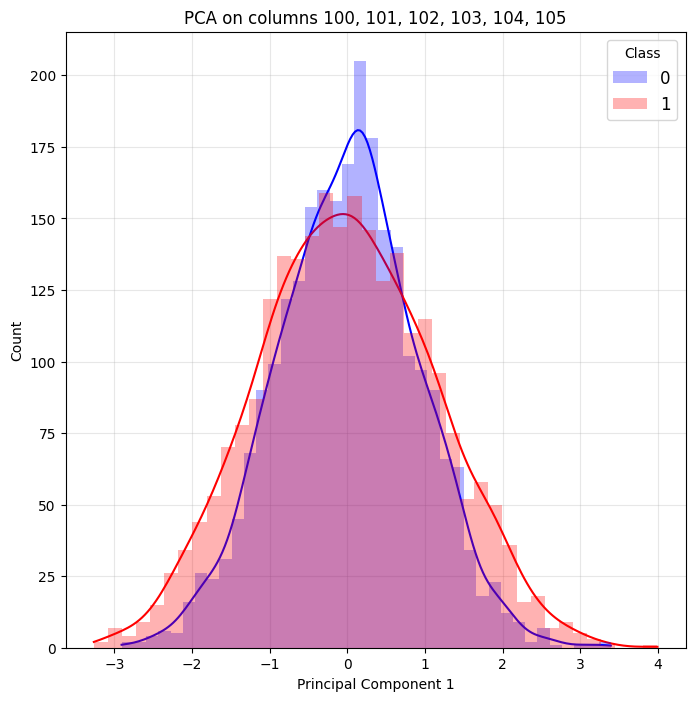

In [167]:
# 1d pce
pca = PCA(n_components=1)
train_important_pca = pca.fit_transform(train_important)
print(train_important_pca)

# Plot
plt.figure(figsize=(8, 8))
# histogram with two classes
sns.histplot(
    train_important_pca[y_train == 0],
    color="blue",
    kde=True,
    alpha=0.3,
    bins=40,
    label="0",
    linewidth=0,
    zorder=1000,
)
sns.histplot(
    train_important_pca[y_train == 1],
    color="red",
    kde=True,
    alpha=0.3,
    bins=40,
    label="1",
    linewidth=0,
    zorder=1000,
)
# make grid more transparent
plt.grid(alpha=0.3)
plt.xlabel("Principal Component 1")
plt.legend(title="Class", fontsize="large")
plt.title("PCA on columns 100, 101, 102, 103, 104, 105")

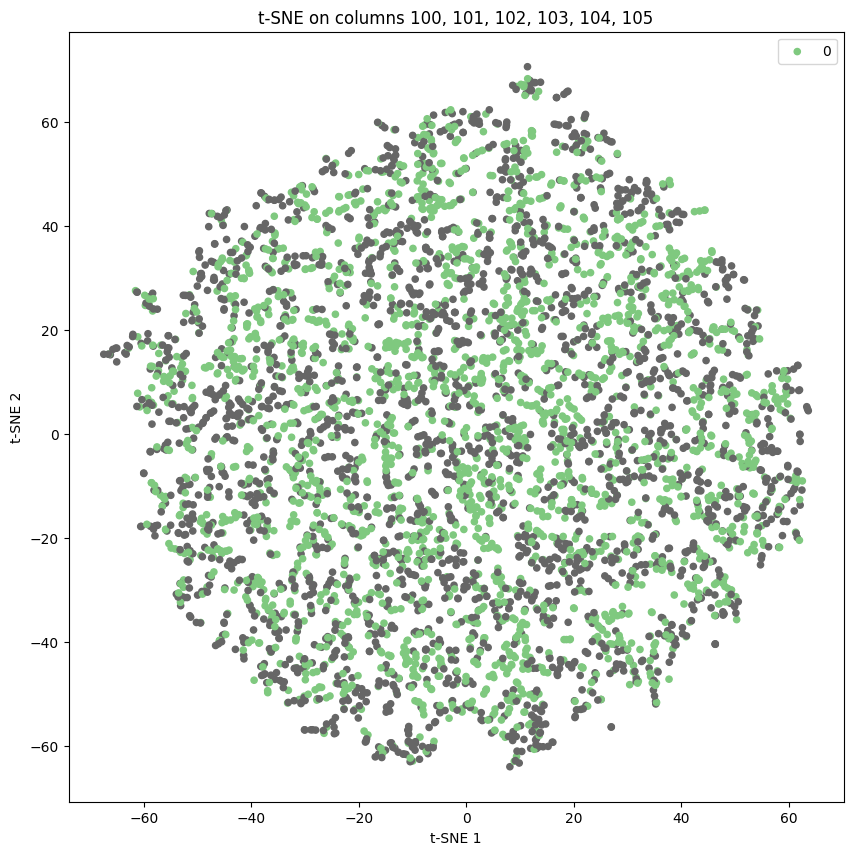

In [168]:
# now try t-sne
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
train_important_tsne = tsne.fit_transform(train_important)

# Plot
plt.figure(figsize=(10, 10))
plt.scatter(
    train_important_tsne[:, 0],
    train_important_tsne[:, 1],
    c=y_train,
    s=20,
    cmap="Accent",
)
plt.title("t-SNE on columns 100, 101, 102, 103, 104, 105")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend(["0", "1"])
plt.show()

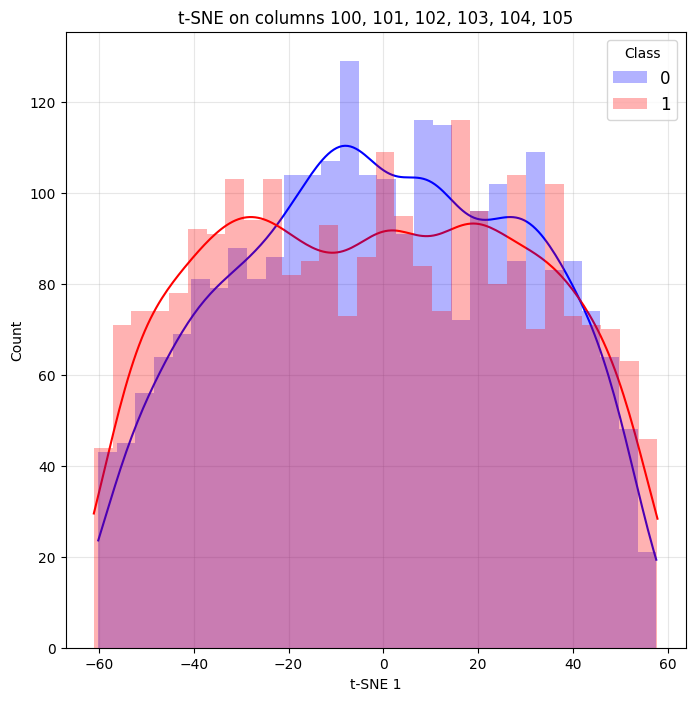

In [93]:
# now 1d
tsne = TSNE(n_components=1, random_state=0)
train_important_tsne = tsne.fit_transform(train_important)

# Plot
plt.figure(figsize=(8, 8))
# histogram with two classes
sns.histplot(
    train_important_tsne[y == 0],
    color="blue",
    kde=True,
    alpha=0.3,
    bins=30,
    label="0",
    linewidth=0,
    zorder=1000,
)
sns.histplot(
    train_important_tsne[y == 1],
    color="red",
    kde=True,
    alpha=0.3,
    bins=30,
    label="1",
    linewidth=0,
    zorder=1000,
)
# make grid more transparent
plt.grid(alpha=0.3)
plt.xlabel("t-SNE 1")
plt.legend(title="Class", fontsize="large")
plt.title("t-SNE on columns 100, 101, 102, 103, 104, 105")
plt.show()

/Users/mat/opt/anaconda3/envs/asseco/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


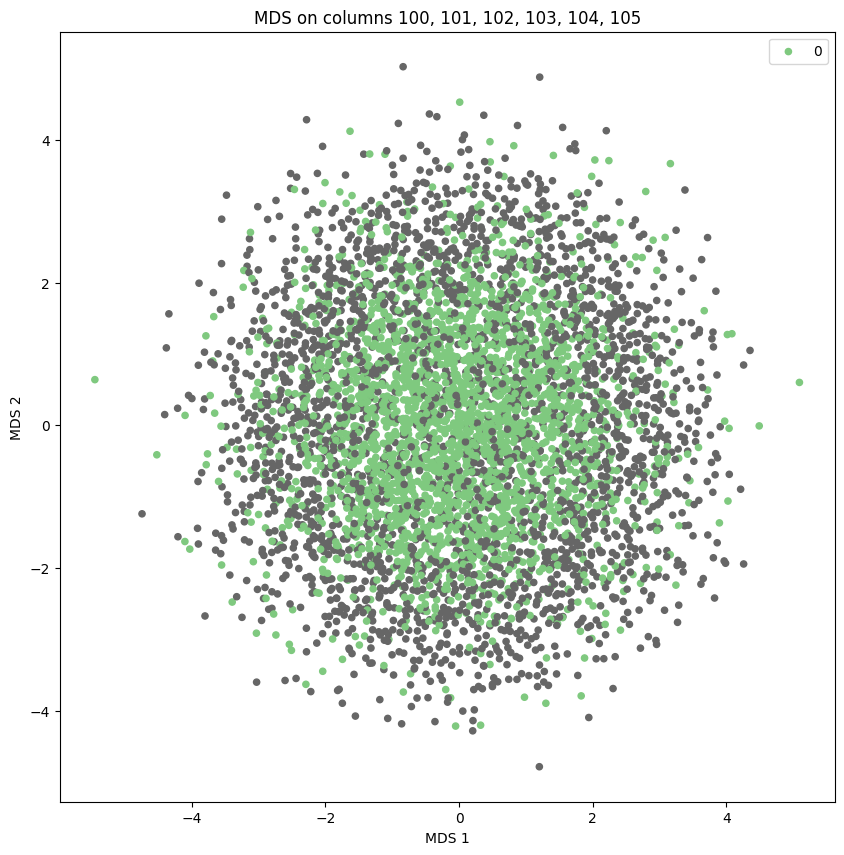

In [94]:
# now 2d ppa
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=0)
train_important_mds = mds.fit_transform(train_important)

# Plot
plt.figure(figsize=(10, 10))
plt.scatter(
    train_important_mds[:, 0],
    train_important_mds[:, 1],
    c=y_train,
    s=20,
    cmap="Accent",
)
plt.title("MDS on columns 100, 101, 102, 103, 104, 105")
plt.xlabel("MDS 1")
plt.ylabel("MDS 2")
plt.legend(["0", "1"])
plt.show()

## test promising method in proper settings to avoid data leakage 

In [3]:
x_train = np.load("../../data/x_train.npy")
y_train = np.load("../../data/y_train.npy")


x_val = np.load("../../data/x_val.npy")
y_val = np.load("../../data/y_val.npy")

train_important = x_train[:, [100, 101, 102, 103, 104, 105]]
val_important = x_val[:, [100, 101, 102, 103, 104, 105]]
y_train = pd.DataFrame(y_train)

/Users/mat/opt/anaconda3/envs/asseco/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Users/mat/opt/anaconda3/envs/asseco/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


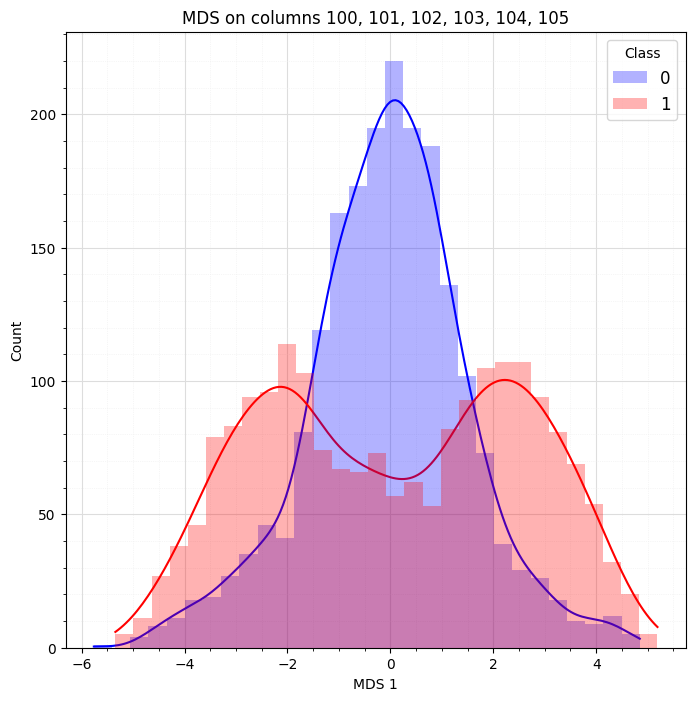

In [199]:
# now 1d

mds = MDS(n_components=1, random_state=0)
train_important_mds = mds.fit_transform(train_important)
test_important_mds = mds.fit_transform(val_important)
# Plot
plt.figure(figsize=(8, 8))
# histogram with two classes
sns.histplot(
    train_important_mds[y_train == 0],
    color="blue",
    kde=True,
    alpha=0.3,
    bins=30,
    label="0",
    linewidth=0,
    zorder=1000,
)
sns.histplot(
    train_important_mds[y_train == 1],
    color="red",
    kde=True,
    alpha=0.3,
    bins=30,
    label="1",
    linewidth=0,
    zorder=1000,
)
# make grid more transparent
plt.grid(which="major", color="#DDDDDD", linewidth=0.8)
# Show the minor grid as well. Style it in very light gray as a thin,
# dotted line.
plt.grid(which="minor", color="#EEEEEE", linestyle=":", linewidth=0.5)
# Make the minor ticks and gridlines show.
plt.minorticks_on()
plt.xlabel("MDS 1")
plt.legend(title="Class", fontsize="large")
plt.title("MDS on columns 100, 101, 102, 103, 104, 105")
plt.show()

In [193]:
y_pred = np.where(
    (test_important_mds > -1.75) & (test_important_mds < 1.75), 0, 1
).flatten()
print("Accuracy: ", np.mean(y_pred == y_val))

Accuracy:  0.719


#### Im gonna choose just 200 most probable observations 

In [208]:
y_pred_positive_right = np.where(
    (test_important_mds > 2.2) & (test_important_mds < 3.53), 1, 0
).flatten()
y_pred_positive_left = np.where(
    (test_important_mds > -3.5) & (test_important_mds < -2.5), 1, 0
).flatten()
y_pred_positive = y_pred_positive_right + y_pred_positive_left

# number of prediction classified as positive
sum(y_pred_positive)

200

In [211]:
sum(y_val[y_pred_positive == 1]) / 200

0.8

## Just three columns 

In [194]:
x_train = np.load("../../data/x_train.npy")
y_train = np.load("../../data/y_train.npy")


x_val = np.load("../../data/x_val.npy")
y_val = np.load("../../data/y_val.npy")

train_important = x_train[:, [100, 102, 105]]
val_important = x_val[:, [100, 102, 105]]
y_train = pd.DataFrame(y_train)

/Users/mat/opt/anaconda3/envs/asseco/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Users/mat/opt/anaconda3/envs/asseco/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


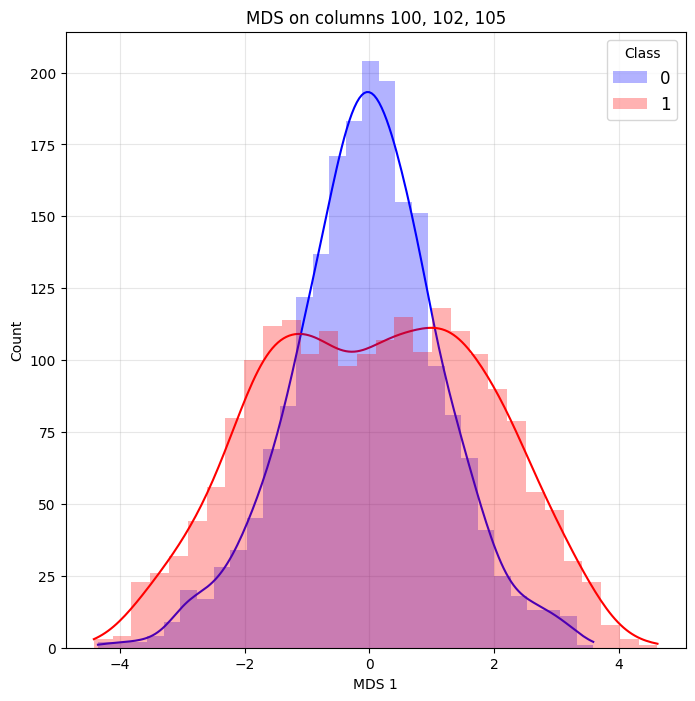

In [195]:
mds = MDS(n_components=1, random_state=0)
train_important_mds = mds.fit_transform(train_important)
test_important_mds = mds.fit_transform(val_important)

# Plot
plt.figure(figsize=(8, 8))
sns.histplot(
    train_important_mds[y_train == 0],
    color="blue",
    kde=True,
    alpha=0.3,
    bins=30,
    label="0",
    linewidth=0,
    zorder=1000,
)
sns.histplot(
    train_important_mds[y_train == 1],
    color="red",
    kde=True,
    alpha=0.3,
    bins=30,
    label="1",
    linewidth=0,
    zorder=1000,
)
plt.grid(alpha=0.3)
plt.xlabel("MDS 1")
plt.legend(title="Class", fontsize="large")
plt.title("MDS on columns 100, 102, 105")
plt.show()

In [196]:
y_pred = np.where(
    (test_important_mds > -1.6) & (test_important_mds < 1.6), 0, 1
).flatten()
print("Accuracy: ", np.mean(y_pred == y_val))

Accuracy:  0.626


# good columns 5, 9, 100, 101, 102, 103, 104, 105

In [4]:
x_train = np.load("../../data/x_train.npy")
y_train = np.load("../../data/y_train.npy")


x_val = np.load("../../data/x_val.npy")
y_val = np.load("../../data/y_val.npy")

train_important = x_train[:, [100, 101, 102, 103, 104, 105]]
val_important = x_val[:, [100, 101, 102, 103, 104, 105]]
y_train = pd.DataFrame(y_train)

In [4]:
from sklearn.manifold import MDS

mds = MDS(
    n_components=1,
    random_state=21,
    n_init=2,
    normalized_stress=False,
    #     eps=0.00001,
    #     max_iter=1000,
)
train_important_mds = mds.fit_transform(train_important)
# test_important_mds = mds.fit_transform(val_important)

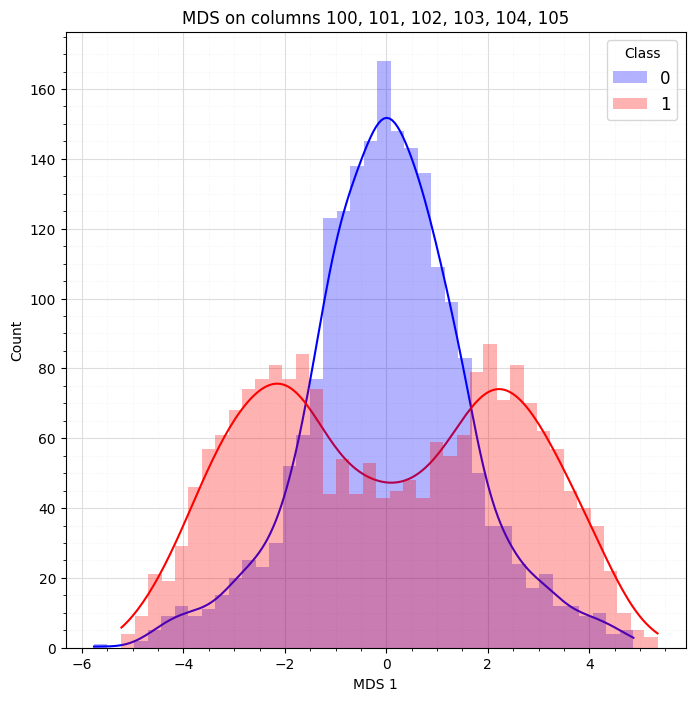

In [15]:
plt.figure(figsize=(8, 8))


sns.histplot(
    train_important_mds[y_train == 0],
    color="blue",
    kde=True,
    alpha=0.3,
    bins=40,
    label="0",
    linewidth=0,
    zorder=1000,
)
sns.histplot(
    train_important_mds[y_train == 1],
    color="red",
    kde=True,
    alpha=0.3,
    bins=40,
    label="1",
    linewidth=0,
    zorder=1000,
)

plt.grid(which="major", color="#DDDDDD", linewidth=0.8)
plt.grid(which="minor", color="#EEEEEE", linestyle=":", linewidth=0.5)
plt.minorticks_on()
plt.xlabel("MDS 1")
plt.legend(title="Class", fontsize="large")
plt.title("MDS on columns 100, 101, 102, 103, 104, 105")
plt.show()

## Formalization of mds

In [90]:
x_train = np.load("../../data/x_train.npy")
y_train = np.load("../../data/y_train.npy")


x_val = np.load("../../data/x_val.npy")
y_val = np.load("../../data/y_val.npy")

train_important = x_train[:, [100, 101, 102, 103, 104, 105]]
val_important = x_val[:, [100, 101, 102, 103, 104, 105]]
y_train = pd.DataFrame(y_train)

In [91]:
from sklearn.manifold import MDS

mds = MDS(
    n_components=1,
    random_state=21,
    n_init=10,
    normalized_stress=False,
    #     eps=0.00001,
    #     max_iter=1000,
)
train_important_mds = mds.fit_transform(train_important)
# test_important_mds = mds.fit_transform(val_important)

In [92]:
# import kde
from sklearn.neighbors import KernelDensity

train_important_mds_for_kde = train_important_mds[y_train == 0].reshape(-1, 1)
kde = KernelDensity(kernel="gaussian", bandwidth=0.3).fit(train_important_mds_for_kde)

train_important_mds_for_kde_2 = train_important_mds[y_train == 1].reshape(-1, 1)
kde_2 = KernelDensity(kernel="gaussian", bandwidth=0.3).fit(
    train_important_mds_for_kde_2
)

Text(0.5, 1.0, 'MDS on columns 100, 101, 102, 103, 104, 105')

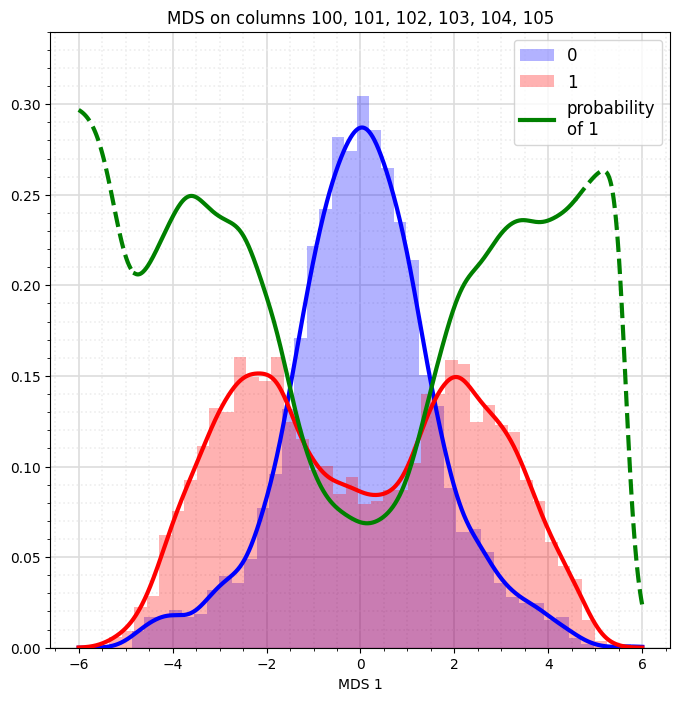

In [104]:
# make a histogram without sns
plt.figure(figsize=(8, 8))

plt.hist(
    train_important_mds[y_train == 0],
    color="blue",
    alpha=0.3,
    bins=40,
    label="0",
    linewidth=0,
    zorder=10,
    density=True,
)
plt.hist(
    train_important_mds[y_train == 1],
    color="red",
    alpha=0.3,
    bins=40,
    label="1",
    linewidth=0,
    zorder=10,
    density=True,
)

x = np.linspace(-6, 6, 1000)
y_0 = np.exp(kde.score_samples(x.reshape(-1, 1)))
y_1 = np.exp(kde_2.score_samples(x.reshape(-1, 1)))
plt.plot(
    x,
    y_0,
    color="blue",
    linewidth=3,
    zorder=11,
)

plt.plot(
    x,
    y_1,
    color="red",
    linewidth=3,
    zorder=11,
)

start = 100
end = 880
scaling_factor = 0.3

plt.plot(
    x[start:end],
    scaling_factor * y_1[start:end] / (y_0[start:end] + y_1[start:end]),
    color="green",
    linewidth=3,
    label="probability\nof 1",
    zorder=12,
)
plt.plot(
    x[:start],
    scaling_factor * y_1[:start] / (y_0[:start] + y_1[:start]),
    color="green",
    linewidth=3,
    zorder=12,
    linestyle="--",
)

plt.plot(
    x[end:],
    scaling_factor * y_1[end:] / (y_0[end:] + y_1[end:]),
    color="green",
    linewidth=3,
    zorder=12,
    linestyle="--",
)

plt.grid(which="major", color="#DDDDDD", linewidth=1.2)
plt.grid(which="minor", color="#EEEEEE", linestyle=":", linewidth=1.2)
plt.minorticks_on()
plt.xlabel("MDS 1")
plt.ylim(0, 0.34)
leg = plt.legend(fontsize="large", loc="upper right")
leg.set(zorder=13)
plt.title("MDS on columns 100, 101, 102, 103, 104, 105")

(0.0, 1.0)

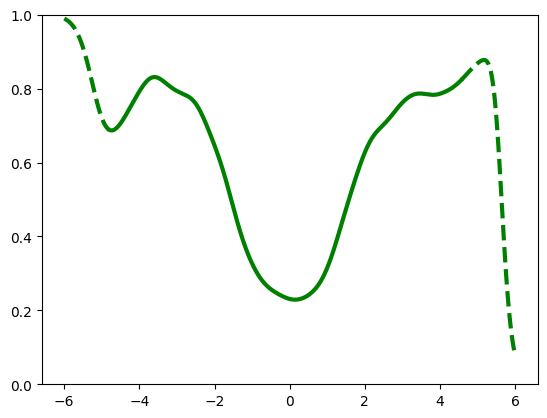

In [97]:
scaling_factor = 1

plt.plot(
    x[start:end],
    scaling_factor * y_1[start:end] / (y_0[start:end] + y_1[start:end]),
    color="green",
    linewidth=3,
    label="scaled ratio of 1 to 0",
    zorder=12,
)
plt.plot(
    x[:start],
    scaling_factor * y_1[:start] / (y_0[:start] + y_1[:start]),
    color="green",
    linewidth=3,
    zorder=12,
    linestyle="--",
)

plt.plot(
    x[end:],
    scaling_factor * y_1[end:] / (y_0[end:] + y_1[end:]),
    color="green",
    linewidth=3,
    zorder=12,
    linestyle="--",
)
plt.ylim(0, 1)

## adding mds to features and training on it

In [15]:
x_train = np.load("../../data/x_train.npy")
y_train = np.load("../../data/y_train.npy")


x_val = np.load("../../data/x_val.npy")
y_val = np.load("../../data/y_val.npy")

train_important = x_train[:, [100, 101, 102, 103, 104, 105]]
val_important = x_val[:, [100, 101, 102, 103, 104, 105]]
y_train = pd.DataFrame(y_train)
y = y_train.values.ravel()

In [ ]:
from sklearn.manifold import MDS

mds = MDS(
    n_components=1,
    random_state=21,
    n_init=2,
    normalized_stress=False,
    #     eps=0.00001,
    #     max_iter=1000,
)
train_important_mds = mds.fit_transform(train_important)

In [17]:
# train_important_with_mds = np.concatenate(
#     [train_important_mds, train_important], axis=1
# )
train_important_with_mds = train_important_mds

# build svm on train_important_with_mds
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

random.seed(423)
random_states = [random.randint(0, 10000) for i in range(80)]
random_states

accuracies_svm_with_interactions = []

for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(
        train_important_with_mds, y, test_size=0.11, random_state=random_state
    )

    svm_with_interactions = SVC()
    svm_with_interactions.fit(X_train, y_train)
    accuracy = svm_with_interactions.score(X_test, y_test)
    accuracies_svm_with_interactions.append(accuracy)

print(f"Accuracy: {np.mean(accuracies_svm_with_interactions)}")

Accuracy: 0.7095454545454546


okay so mds add to random forest a lot + 10% acc from 60 to 70

In [22]:
from sklearn.ensemble import RandomForestClassifier

train_important_with_mds = np.concatenate(
    [train_important_mds, train_important], axis=1
)

random.seed(423)
random_states = [random.randint(0, 10000) for i in range(80)]
random_states

accuracies_rf_with_interactions = []

for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(
        train_important_with_mds, y, test_size=0.11, random_state=random_state
    )

    rf_with_interactions = RandomForestClassifier(n_estimators=100)
    rf_with_interactions.fit(X_train, y_train)
    accuracy = rf_with_interactions.score(X_test, y_test)
    accuracies_rf_with_interactions.append(accuracy)

print(f"Accuracy: {np.mean(accuracies_rf_with_interactions)}")

Accuracy: 0.7015625
